In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\i7 11Th\Desktop\Python2Proj\Data\attempts.csv")
data
match_played=pd.read_csv(r"C:\Users\i7 11Th\Desktop\Python2Proj\UCL_2021_22_Team_Matches.csv")
match_played=match_played.iloc[:,1].values
match_played=list(match_played)

player_team=data.iloc[:,[2,5,-1]].values
player_team


array([['Real Madrid', 23, 12],
       ['Liverpool', 22, 13],
       ['Man. City', 18, 12],
       ...,
       ['Club Brugge', 0, 1],
       ['Benfica', 0, 1],
       ['Barcelona', 0, 1]], dtype=object)

In [4]:
club_list=[]
club_on_target_total=[]

#get the club list using for loop
for i in player_team[:,0]:
    if(i not in club_list):
        club_list.append(i)

#get how much each club got on target
for i in club_list:
    count=0
    for j in player_team:
        if(i==j[0]):
            count=count+j[1]
    club_on_target_total.append(count)
    

#calculating avg
avg=[]
club_table=list(zip(list(club_list),list(club_on_target_total),list(match_played)))
for i in club_table:
    avg.append(i[1]/i[2])

club_table
avg1=list(zip(club_list,avg))
avg1=np.array(avg1)
avg1
on_target=avg1[:,1]#attackers
sorted_indices = np.argsort(on_target)
final_data1 = avg1[sorted_indices].copy()
final_data1[:,1]=np.nan_to_num(final_data1[:,1]).astype(float)

final_data1


array([['Malmö', '1.1666666666666667'],
       ['Wolfsburg', '1.8333333333333333'],
       ['Barcelona', '1.8333333333333333'],
       ['Beşiktaş', '2.0'],
       ['Porto', '2.5'],
       ['Milan', '2.6666666666666665'],
       ['Dynamo Kyiv', '2.6666666666666665'],
       ['LOSC', '2.75'],
       ['Sheriff', '3.3333333333333335'],
       ['Shakhtar Donetsk', '3.5'],
       ['Atalanta', '3.75'],
       ['Sevilla', '3.8333333333333335'],
       ['Club Brugge', '4.0'],
       ['Inter', '4.0'],
       ['Young Boys', '4.166666666666667'],
       ['Leipzig', '4.25'],
       ['Zenit', '4.5'],
       ['Atlético', '4.5'],
       ['Salzburg', '4.625'],
       ['Juventus', '4.625'],
       ['Dortmund', '4.833333333333333'],
       ['Paris', '4.875'],
       ['Man. United', '5.0'],
       ['Sporting CP', '5.166666666666667'],
       ['Real Madrid', '5.3076923076923075'],
       ['Villarreal', '5.625'],
       ['Man. City', '5.666666666666667'],
       ['Liverpool', '5.6923076923076925'],
       [

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Malmö', 'Wolfsburg', 'Barcelona', 'Beşiktaş', 'Porto', 'Milan', 'Dynamo Kyiv', 'LOSC', 'Sheriff', 'Shakhtar Donetsk', 'Atalanta', 'Sevilla', 'Club Brugge', 'Inter', 'Young Boys', 'Leipzig', 'Zenit', 'Atlético', 'Salzburg', 'Juventus', 'Dortmund', 'Paris', 'Man. United', 'Sporting CP', 'Real Madrid', 'Villarreal', 'Man. City', 'Liverpool', 'Chelsea', 'Benfica', 'Bayern', 'Ajax'] [['Real Madrid' '5.3076923076923075']
 ['Liverpool' '5.6923076923076925']
 ['Man. City' '5.666666666666667']
 ['Bayern' '5.833333333333333']
 ['Porto' '2.5']
 ['Inter' '4.0']
 ['Paris' '4.875']
 ['Chelsea' '5.7']
 ['Ajax' '6.5']
 ['Villarreal' '5.625']
 ['LOSC' '2.75']
 ['Man. United' '5.0']
 ['Atalanta' '3.75']
 ['Leipzig' '4.25']
 ['Juventus' '4.625']
 ['Salzburg' '4.625']
 ['Sporting CP' '5.166666666666667']
 ['Benfica' '5.833333333333333']
 ['Dortmund' '4.833333333333333']
 ['Sheriff' '3.3333333333333335']
 ['Atlético' '4.5']
 ['Zenit' '4.5']
 ['Club Brugge' '4.0']
 ['Shakhtar Donetsk' '3.5']
 ['Sevilla' '

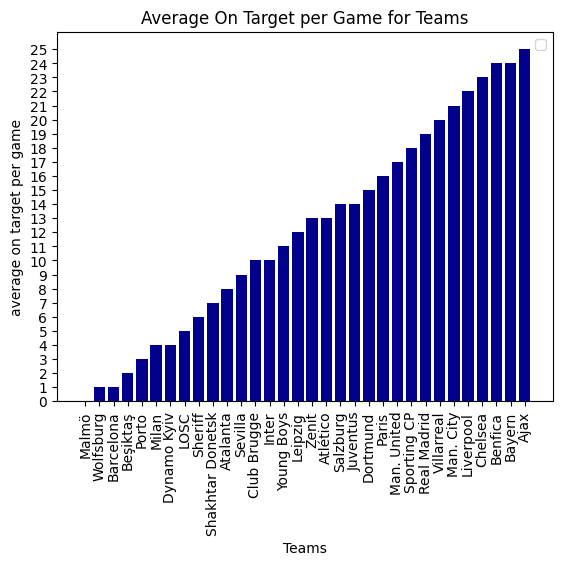

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
teams=list(final_data1[:,0])
print(teams,avg1)
pos_bars = ax.bar(teams, final_data1[:,1], color='darkblue')
ax.set_xlabel('Teams')
ax.set_ylabel('average on target per game')
ax.set_xticks(range(len(final_data1[:,0])))  

ax.set_xticklabels(teams, rotation=90) 
#plt.yticks([])
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels([f"{int(x)}" for x in plt.gca().get_yticks()])
ax.set_title('Average On Target per Game for Teams')
ax.axhline(0, color='grey', linewidth=0.8)  
ax.legend()
plt.show()

In [7]:
df=pd.DataFrame(final_data1)
df.to_csv('avg_on_target_result.csv', index=True)
